In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox
import censusdata

In [2]:
df=pd.read_csv('US_Accidents_Dec20.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [5]:
df.isnull().sum()

ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

In [6]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


<AxesSubplot:title={'center':'Severity Count by Sources'}, xlabel='Source'>

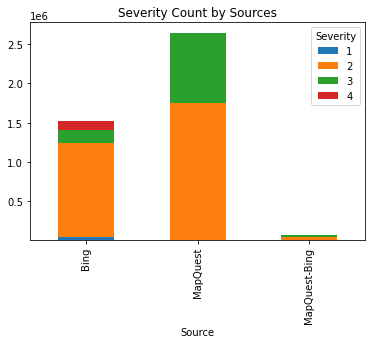

In [7]:
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  134.661 min


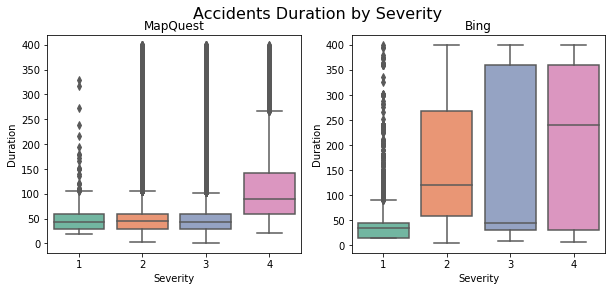

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="MapQuest") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Accidents Duration by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Bing") & (df['Duration']<400),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

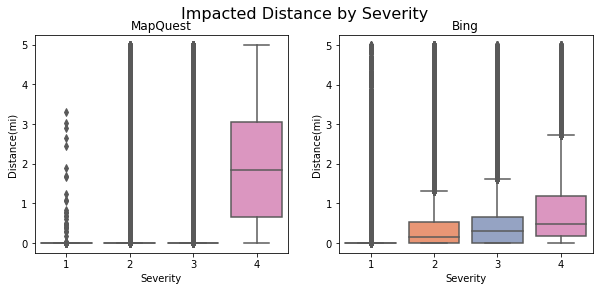

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="MapQuest") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Bing") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

In [11]:
df = df.drop(['ID','TMC','Description','Distance(mi)', 'End_Time', 'Duration', 
              'End_Lat', 'End_Lng'], axis=1)

In [12]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [13]:
df = df.drop(['Country','Turning_Loop'], axis=1)

In [14]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [15]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


In [16]:
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vici

In [17]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [18]:
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

In [19]:
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(df.Weather_Timestamp - df.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:00:54.009291596


In [20]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,0,39,5,346.0
1,2016-02-08 06:07:59,2016,2,0,39,6,367.0
2,2016-02-08 06:49:27,2016,2,0,39,6,409.0
3,2016-02-08 07:23:34,2016,2,0,39,7,443.0
4,2016-02-08 07:39:07,2016,2,0,39,7,459.0


In [21]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
5,Number,63.506745
8,City,0.003237
11,Zipcode,0.030525
12,Timezone,0.109036
13,Airport_Code,0.212000
14,Temperature(F),2.124020
15,Wind_Chill(F),44.795809
16,Humidity(%),2.255548
17,Pressure(in),1.804684
18,Visibility(mi),2.331176


In [22]:
df = df.drop(['Number','Wind_Chill(F)'], axis=1)

In [23]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.03,0


In [24]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [25]:
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 
Temperature(F) : 8189
Humidity(%) : 8208
Pressure(in) : 8168
Visibility(mi) : 21173
Wind_Speed(mph) : 20970


In [26]:
df = df.dropna(subset=Weather_data)

In [27]:
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))

df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 
Wind_Direction : 24501
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0


In [28]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

0    4055940
1     121348
Name: Severity4, dtype: int64

In [29]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

In [30]:
df_bl = resample(df, 'Severity4', 50000)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: 0    50000
1    50000
Name: Severity4, dtype: int64


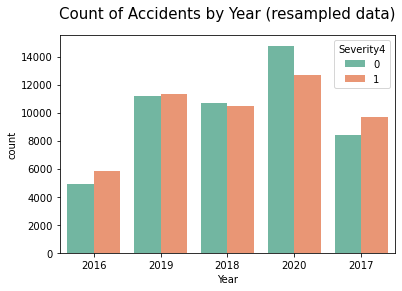

In [31]:
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

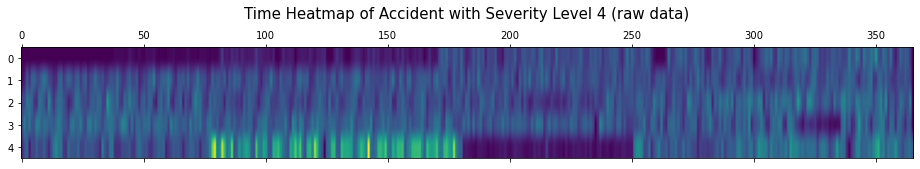

In [32]:
# create a dataframe used to plot heatmap
df_date = df.loc[:,['Start_Time','Severity4']]         # create a new dateframe only containing time and severity
df_date['date'] = df_date['Start_Time'].dt.normalize() # keep only the date part of start time
df_date = df_date.drop(['Start_Time'], axis = 1)
df_date = df_date.groupby('date').sum()                # sum the number of accidents with severity level 4 by date
df_date = df_date.reset_index().drop_duplicates()

# join the dataframe with full range of date from 2016 to 2020
full_date = pd.DataFrame(pd.date_range(start="2016-01-02",end="2020-12-31"))    
df_date = full_date.merge(df_date, how = 'left',left_on = 0, right_on = 'date')
df_date['date'] = df_date.iloc[:,0]
df_date = df_date.fillna(0)
df_date = df_date.iloc[:,1:].set_index('date')

# group by date
groups = df_date['Severity4'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    if name.year != 2020:
        years[name.year] = np.append(group.values,0)
    else:
        years[name.year] = group.values
  

# plot
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.title('Time Heatmap of Accident with Severity Level 4 (raw data)', y=1.2, fontsize=15)
plt.show()

In [33]:
df = df.loc[df['Start_Time'] > "2019-03-10",:]
df = df.drop(['Year', 'Start_Time'], axis=1)
df['Severity4'].value_counts()

0    1951077
1      52245
Name: Severity4, dtype: int64

In [34]:
df_bl = resample(df, 'Severity4', 20000)

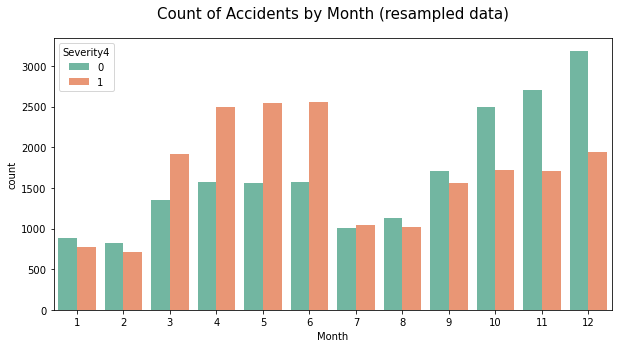

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

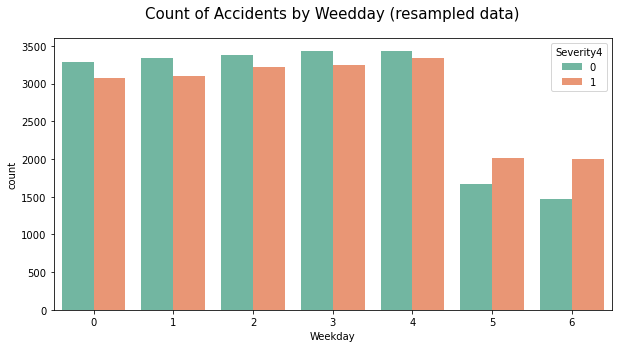

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Weedday (resampled data)', size=15, y=1.05)
plt.show()

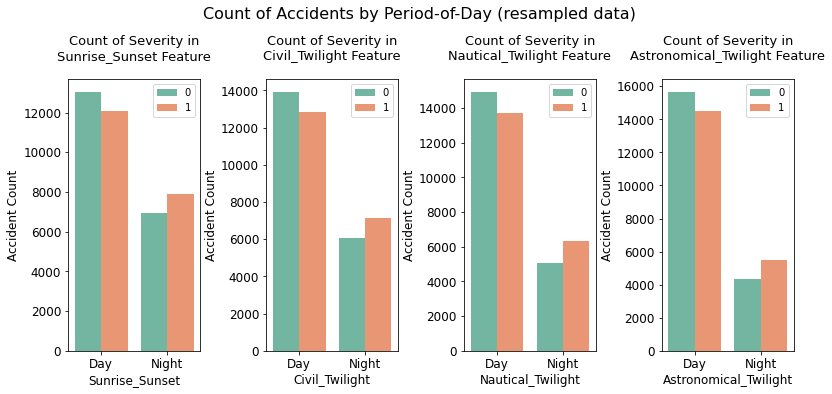

In [37]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day (resampled data)',y=1.08, fontsize=16)
plt.show()

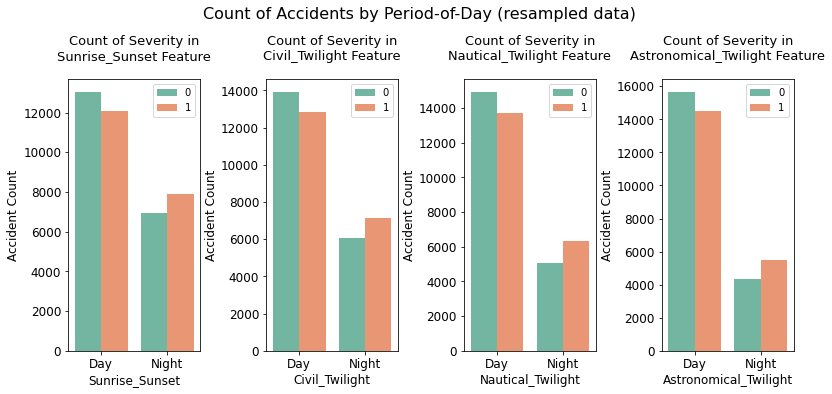

In [38]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day (resampled data)',y=1.08, fontsize=16)
plt.show()

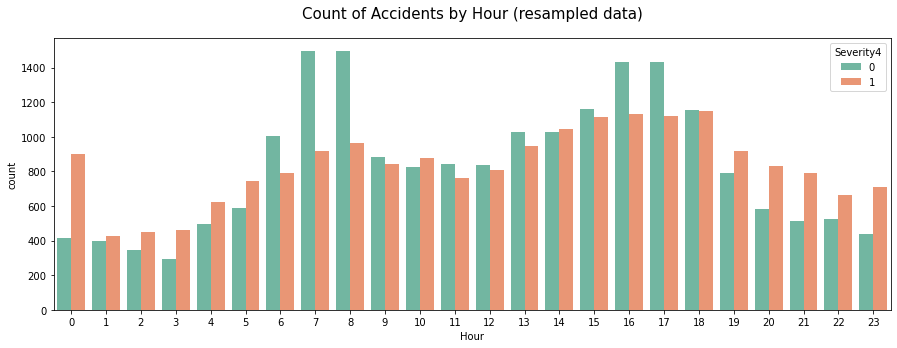

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

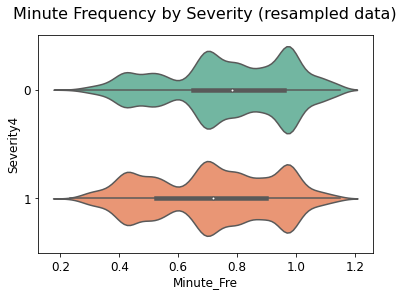

In [40]:
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))

# resampling
df_bl = resample(df, 'Severity4', 20000)

# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity4", data=df_bl, palette="Set2")    
plt.xlabel('Minute_Fre', size=12, labelpad=3)
plt.ylabel('Severity4', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity (resampled data)', size=16, y=1.05)
plt.show()

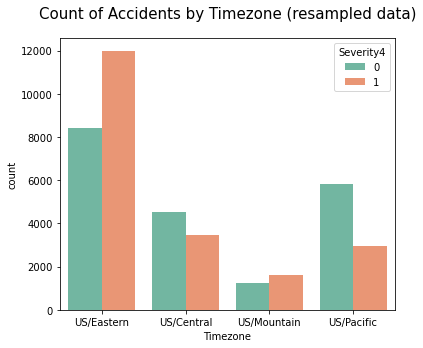

In [41]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Timezone (resampled data)", size=15, y=1.05)
plt.show()

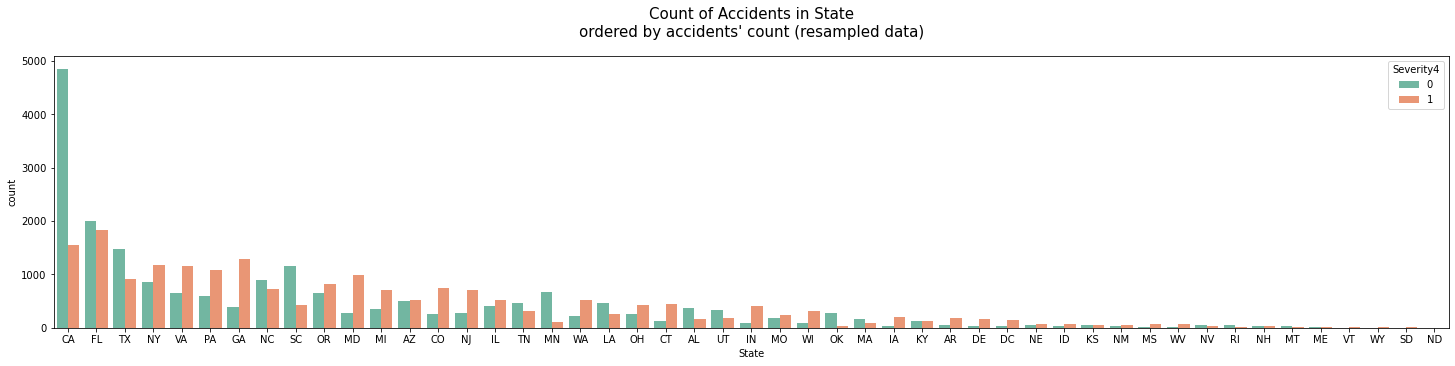

In [42]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', 
                      data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=15, y=1.05)
plt.show()

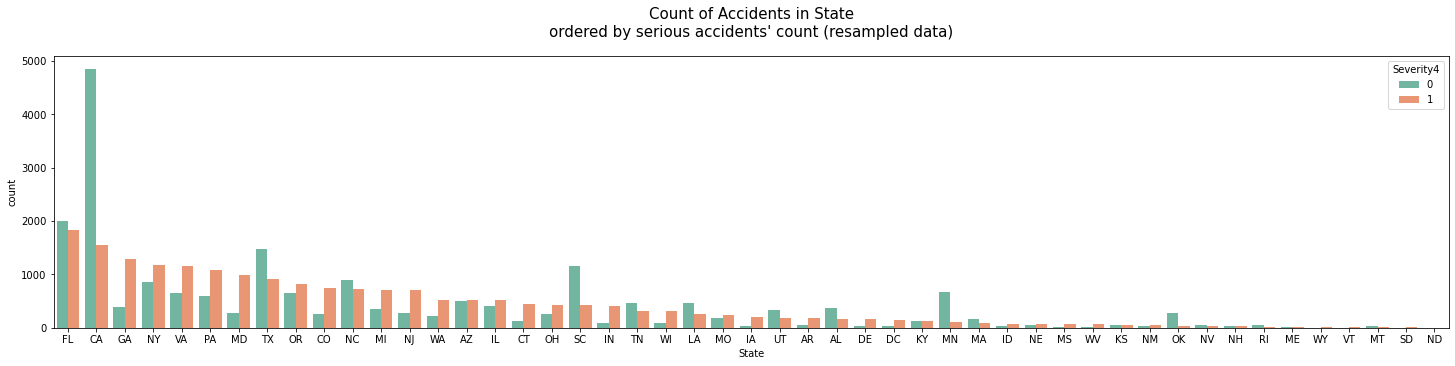

In [43]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', data=df_bl ,palette="Set2", order=df_bl[df_bl['Severity4']==1]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by serious accidents' count (resampled data)", size=15, y=1.05)
plt.show()

In [44]:
county = censusdata.download('acs5', 2018, censusdata.censusgeo([('county', '*')]),
                                   ['DP05_0001E',  'DP03_0019PE','DP03_0021PE','DP03_0022PE','DP03_0062E'],
                                   tabletype='profile')
# rename columns
county.columns = ['Population_County','Drive_County','Transit_County','Walk_County','MedianHouseholdIncome_County']
county = county.reset_index()
# extract county name and state name
county['County_y'] = county['index'].apply(lambda x : x.name.split(' County')[0].split(',')[0]).str.lower()
county['State_y'] = county['index'].apply(lambda x : x.name.split(':')[0].split(', ')[1])


In [45]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
county['State_y'] = county['State_y'].replace(us_state_abbrev)

In [46]:
county.head()

,index,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,County_y,State_y
0,"Petersburg Borough, Alaska: Summary level: 050...",3255,48.8,0.9,20.5,66907,petersburg borough,AK
1,"Kusilvak Census Area, Alaska: Summary level: 0...",8198,4.9,0.1,41.2,35539,kusilvak census area,AK
2,"Maricopa County, Arizona: Summary level: 050, ...",4253913,76.3,2.1,1.5,61606,maricopa,AZ
3,"Graham County, Arizona: Summary level: 050, st...",37879,79.6,0.3,2.1,51352,graham,AZ
4,"Santa Cruz County, Arizona: Summary level: 050...",46584,84.6,0.3,1.4,40467,santa cruz,AZ


In [47]:
df['County'] = df['County'].str.lower()

# left join df with census data
df = df.merge(county, left_on = ['County','State'], right_on=['County_y','State_y'],how = 'left').drop(['County_y','State_y'], axis = 1)
join_var = county.columns.to_list()[:-2]

# check how many miss match we got
print('Count of missing values before: ', df[join_var].isnull().sum())

# add "city" and match again
df_city = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_city['County_city'] = df_city['County'].apply(lambda x : x + ' city')
df_city = df_city.merge(county,left_on= ['County_city','State'],right_on = ['County_y','State_y'], how = 'left').drop(['County_city','County_y','State_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_city), axis=0)

# add "parish" and match again
df_parish = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_parish['County_parish'] = df_parish['County'].apply(lambda x : x + ' parish')
df_parish = df_parish.merge(county,left_on= ['County_parish','State'],right_on = ['County_y','State_y'], how = 'left').drop(['County_parish','County_y','State_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_parish), axis=0)
print('Count of missing values after: ', df[join_var].isnull().sum())

Count of missing values before:  index                           72089
Population_County               72089
Drive_County                    72089
Transit_County                  72089
Walk_County                     72089
MedianHouseholdIncome_County    72089
dtype: int64
Count of missing values after:  index                           18691
Population_County               18691
Drive_County                    18691
Transit_County                  18691
Walk_County                     18691
MedianHouseholdIncome_County    18691
dtype: int64


In [48]:
df = df.drop('index', axis = 1).dropna()

# log-transform
for i in ['Population_County','Transit_County','Walk_County']:
    df[i + '_log'] = df[i].apply(lambda x: np.log(x+1))
df = df.drop(['Population_County','Transit_County','Walk_County'], axis = 1)

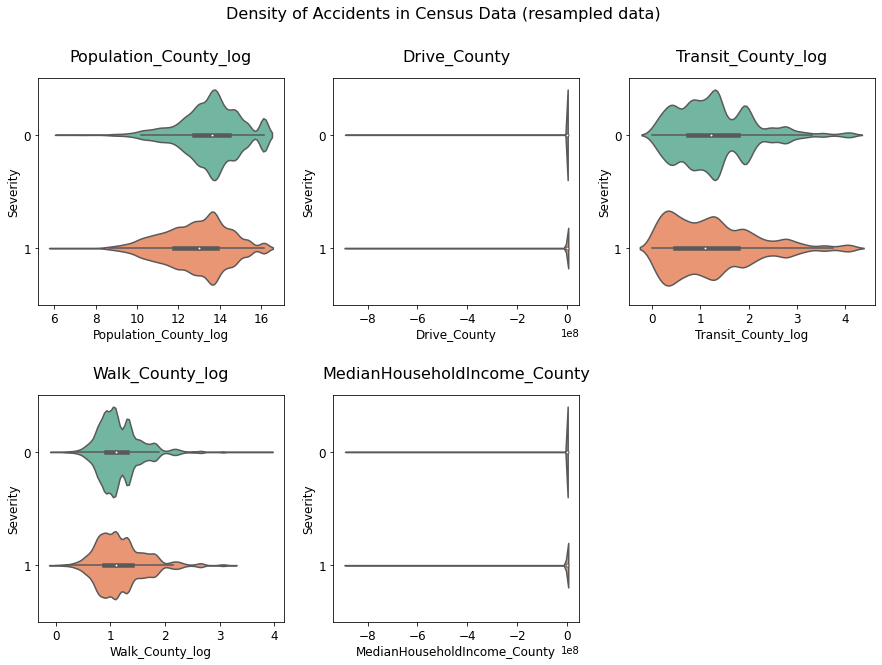

In [49]:
df_bl = resample(df, 'Severity4', 20000)

# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
census_features = ['Population_County_log','Drive_County','Transit_County_log','Walk_County_log','MedianHouseholdIncome_County']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(census_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
fig.suptitle('Density of Accidents in Census Data (resampled data)', fontsize=16)
plt.show()

In [50]:
st_type =' '.join(df['Street'].unique().tolist()) # flat the array of street name
st_type = re.split(" |-", st_type) # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print('the 40 most common words')
print(*st_type, sep = ", ") 

the 40 most common words
, Rd, St, Dr, Ave, N, S, E, W, Blvd, Ln, Highway, Way, Hwy, SW, Ct, NW, Pkwy, State, NE, SE, Road, Pl, Old, Cir, US, Creek, Route, County, Hill, Lake, Park, Trl, Valley, Ridge, Mill, Pike, River, I, Ter


In [51]:
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir',  'Route', 
          'I-', 'Trl', 'Pike', ' Fwy']
print(*st_type, sep = ", ") 

 Rd,  St,  Dr,  Ave,  Blvd,  Ln,  Highway,  Pkwy,  Hwy,  Way,  Ct, Pl,  Road, US-, Creek,  Cir, Route, I-, Trl, Pike,  Fwy


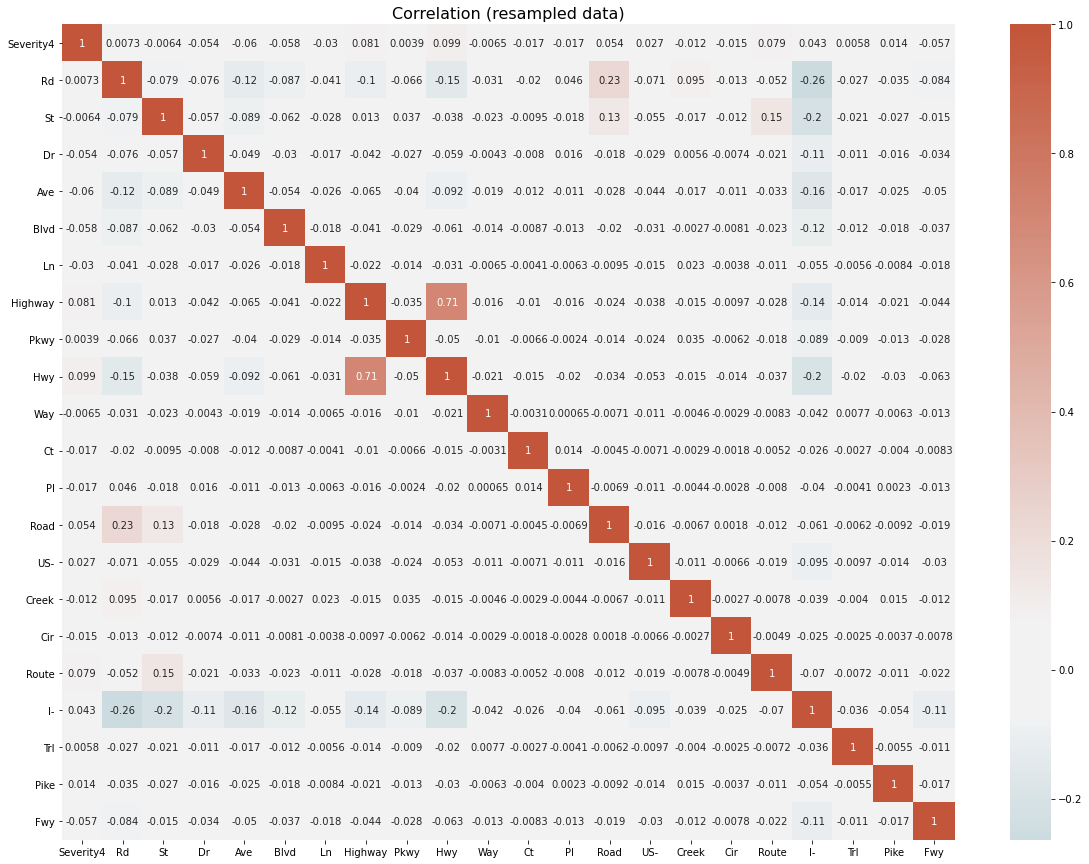

In [52]:
for i in st_type:
  df[i.strip()] = np.where(df['Street'].str.contains(i, case=True, na = False), True, False)
df.loc[df['Road']==1,'Rd'] = True
df.loc[df['Highway']==1,'Hwy'] = True

# resample again
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
street_corr  = df_bl.loc[:,['Severity4']+[x.strip() for x in st_type]].corr()
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Correlation (resampled data)", fontsize=16)
plt.show()

In [53]:
drop_list = street_corr.index[street_corr['Severity4'].abs()<0.1].to_list()
df = df.drop(drop_list, axis=1)

# resample again
df_bl = resample(df, 'Severity4', 20000)

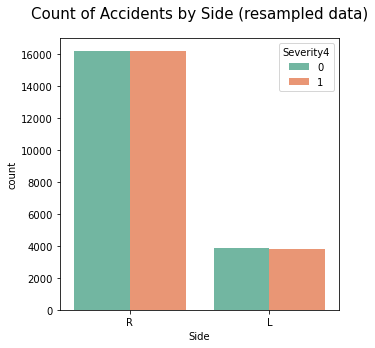

In [54]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Side (resampled data)", size=15, y=1.05)
plt.show()

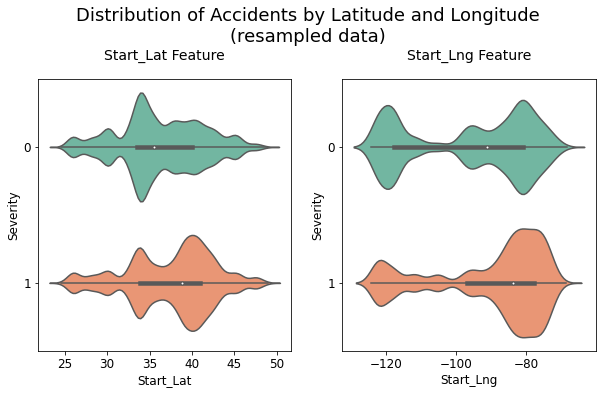

In [55]:
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Start_Lat', 'Start_Lng']
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(1, 2, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Distribution of Accidents by Latitude and Longitude\n(resampled data)', fontsize=18,y=1.08)
plt.show()

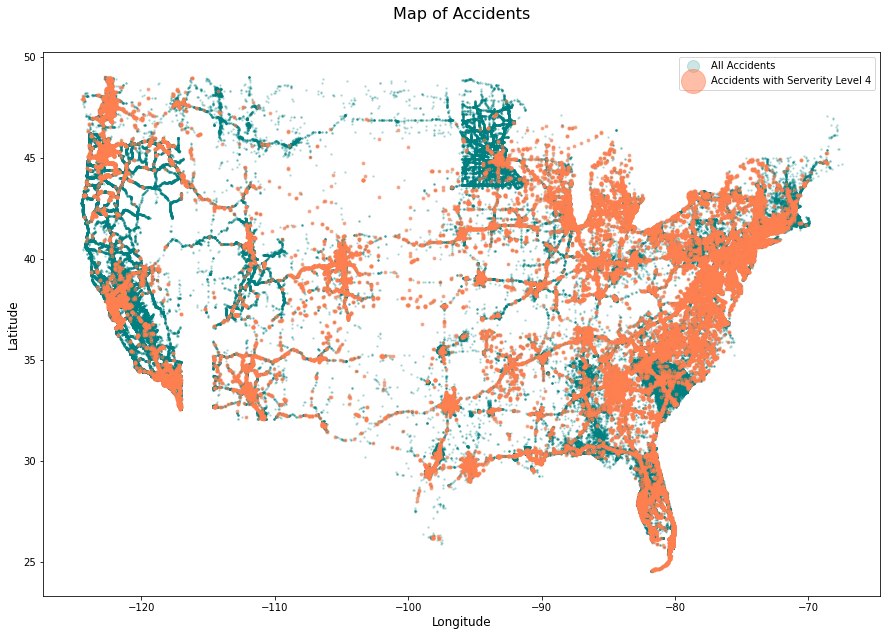

In [56]:
df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

In [57]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size
  df[newname] = df[newname].apply(lambda x: np.log(x+1))

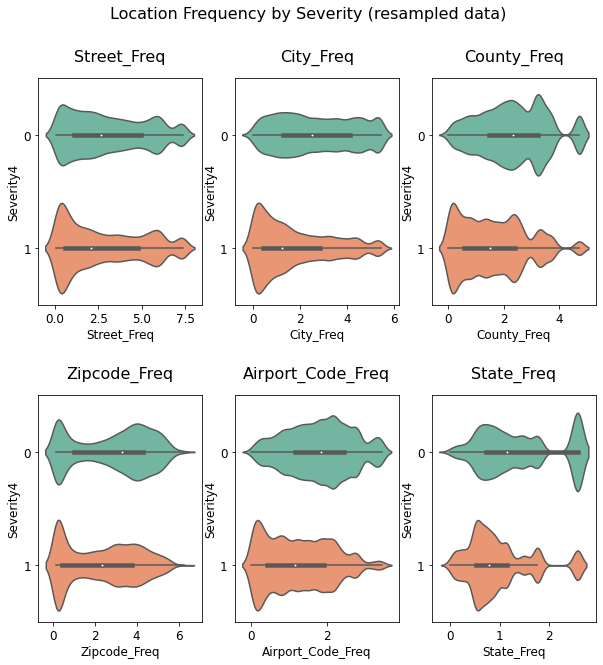

In [58]:
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
fig.suptitle('Location Frequency by Severity (resampled data)', fontsize=16)
for i, feature in enumerate(fre_list, 1): 
    feature = feature + '_Freq'   
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity4', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
plt.show()

In [59]:
df = df.drop(fre_list, axis  = 1)

In [60]:
df['Pressure_bc']= boxcox(df['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df['Visibility_bc']= boxcox(df['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df['Wind_Speed_bc']= boxcox(df['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df = df.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

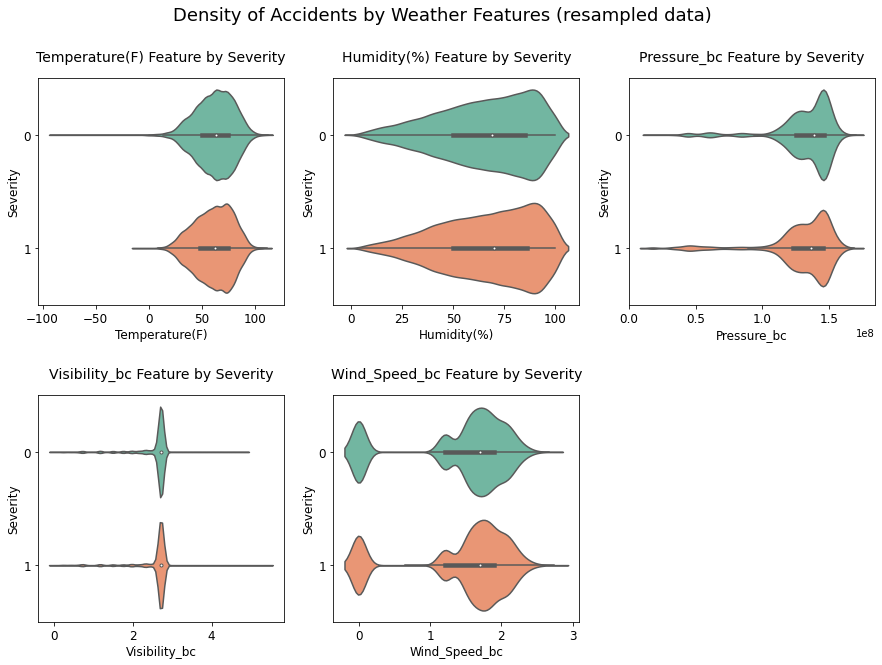

In [61]:
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()


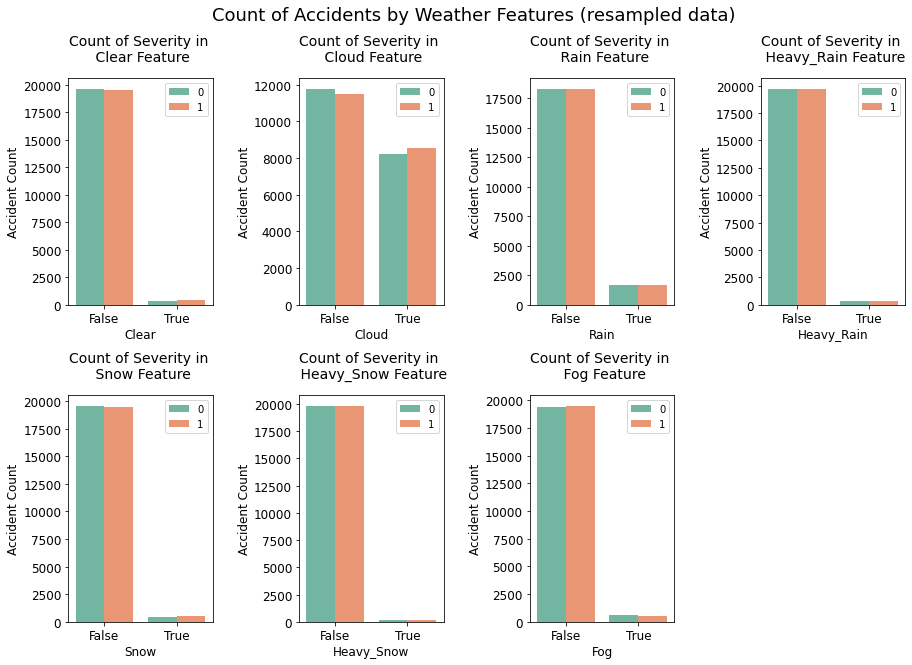

In [62]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

In [63]:
df = df.drop(['Heavy_Rain','Heavy_Snow','Fog'], axis  = 1)

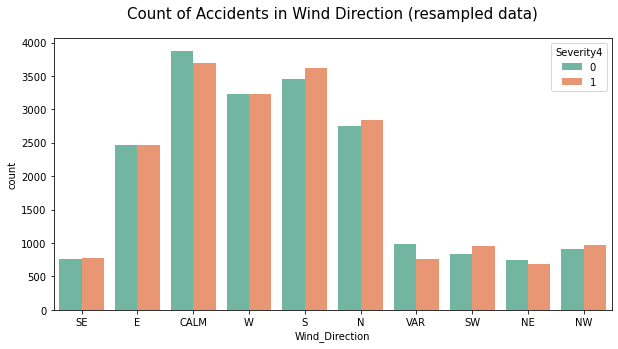

In [64]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents in Wind Direction (resampled data)", size=15, y=1.05)
plt.show()

In [65]:
df = df.drop(['Wind_Direction'], axis=1)

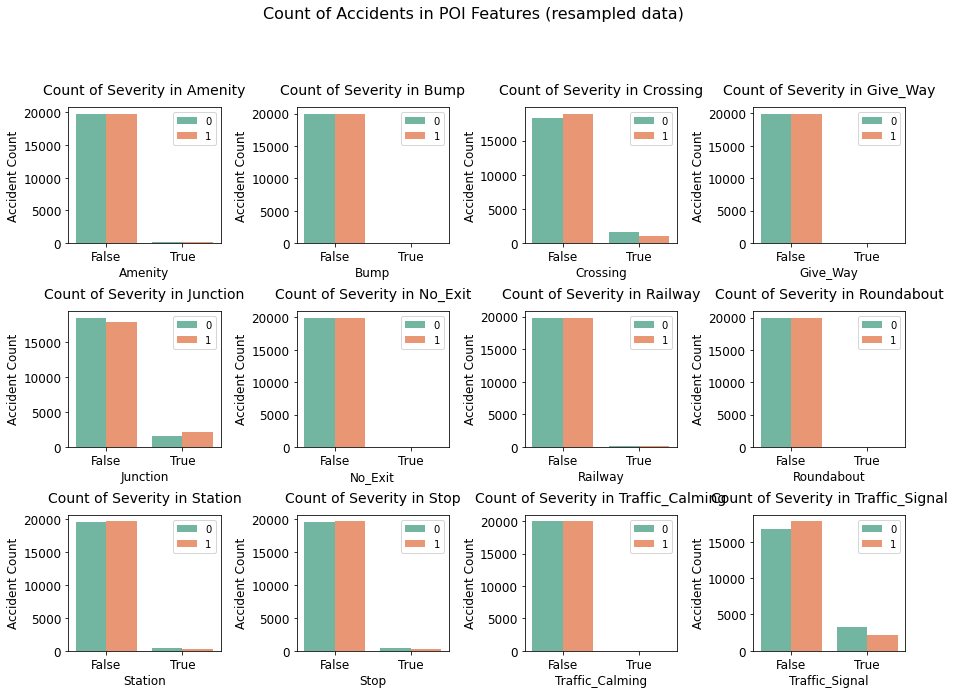

In [66]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

In [67]:
df= df.drop(['Amenity','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [68]:
df[period_features] = df[period_features].astype('category')
df = pd.get_dummies(df, columns=period_features, drop_first=True)

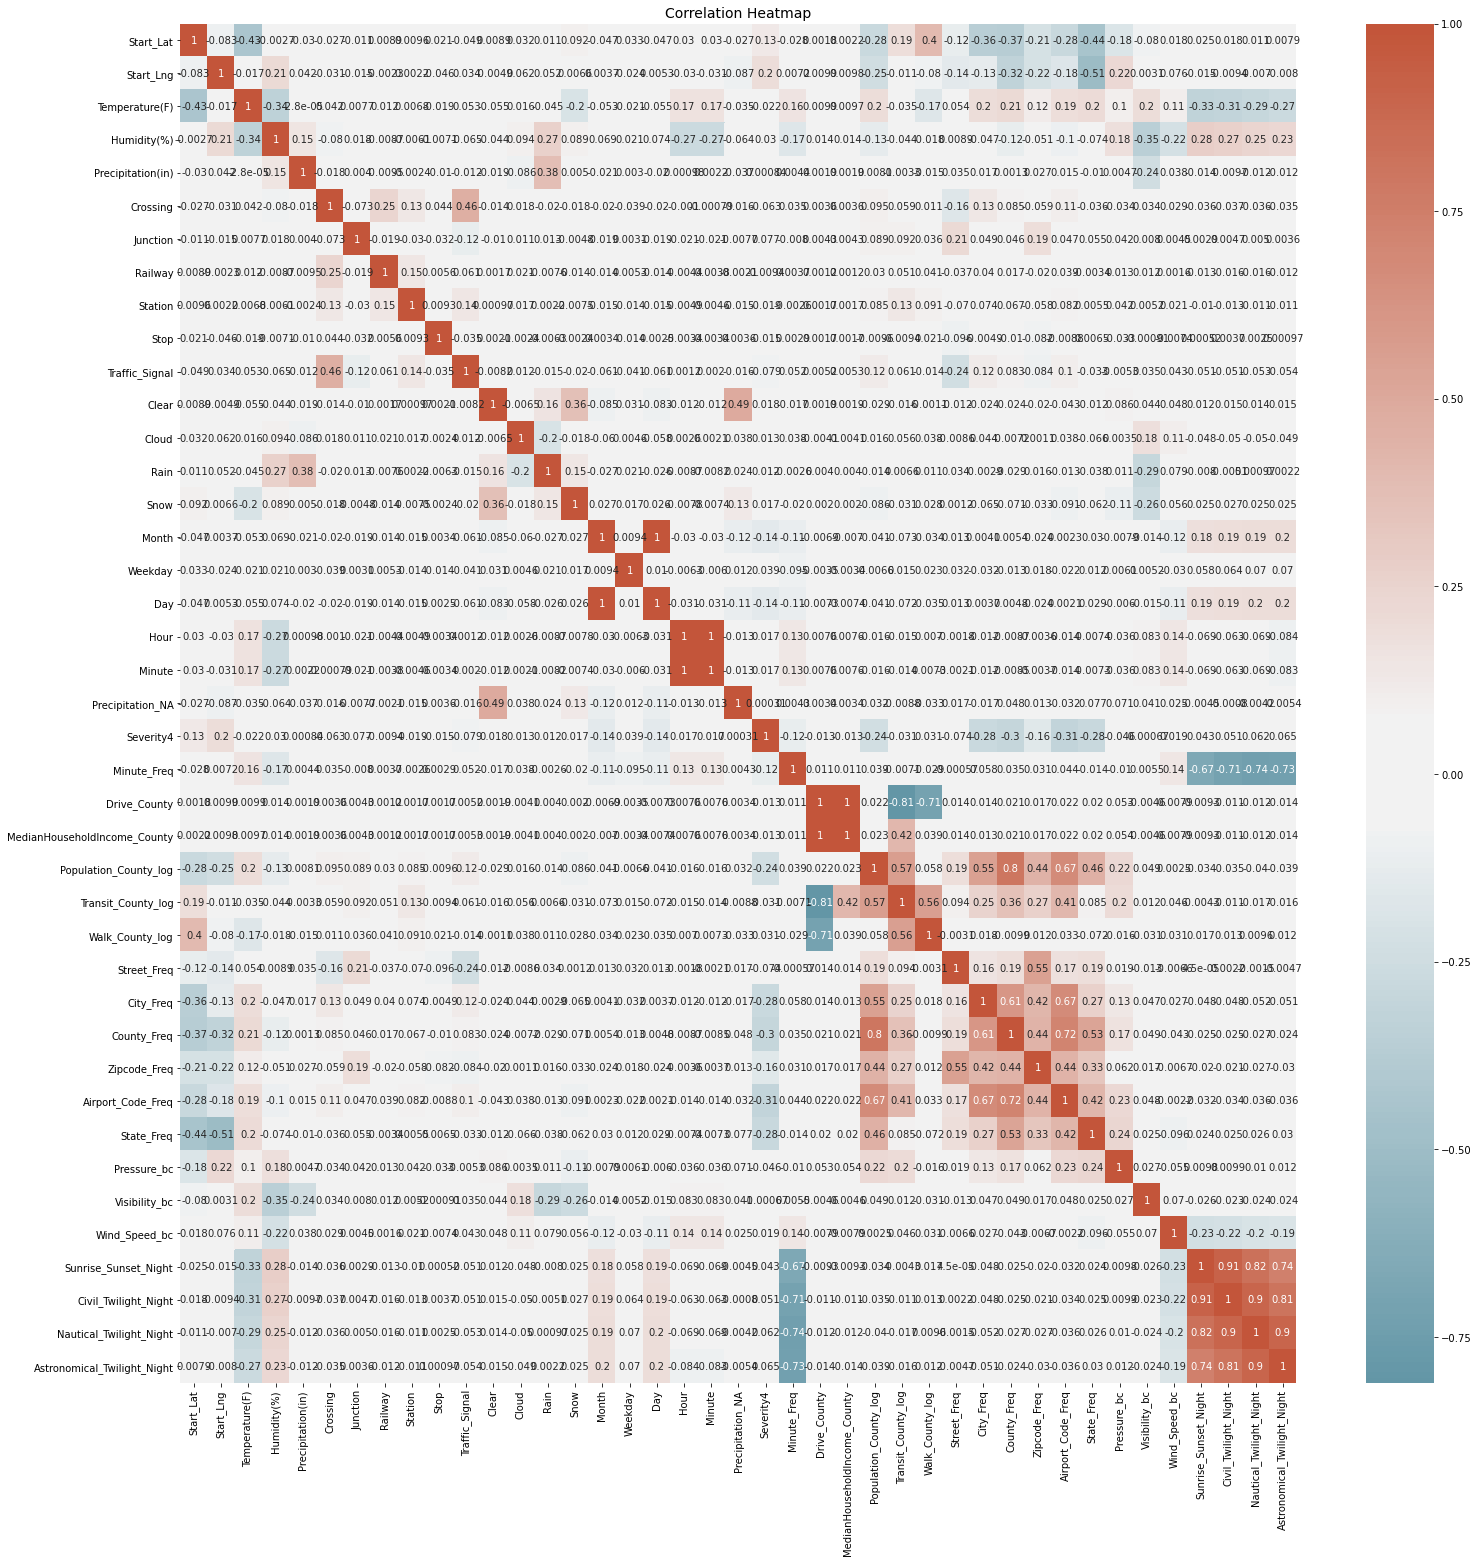

In [69]:
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [70]:
df = df.drop(['Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Precipitation_NA','Visibility_bc', 'Wind_Speed_bc',
              'Clear','Cloud','Snow','Crossing','Junction','Railway','Month',
              'Hour', 'Day','Minute','MedianHouseholdIncome_County', 'Transit_County_log', 
              'Walk_County_log','Drive_County', 'City_Freq','County_Freq','Airport_Code_Freq','Zipcode_Freq',
              'Sunrise_Sunset_Night', 'Civil_Twilight_Night', 'Nautical_Twilight_Night'], axis=1)

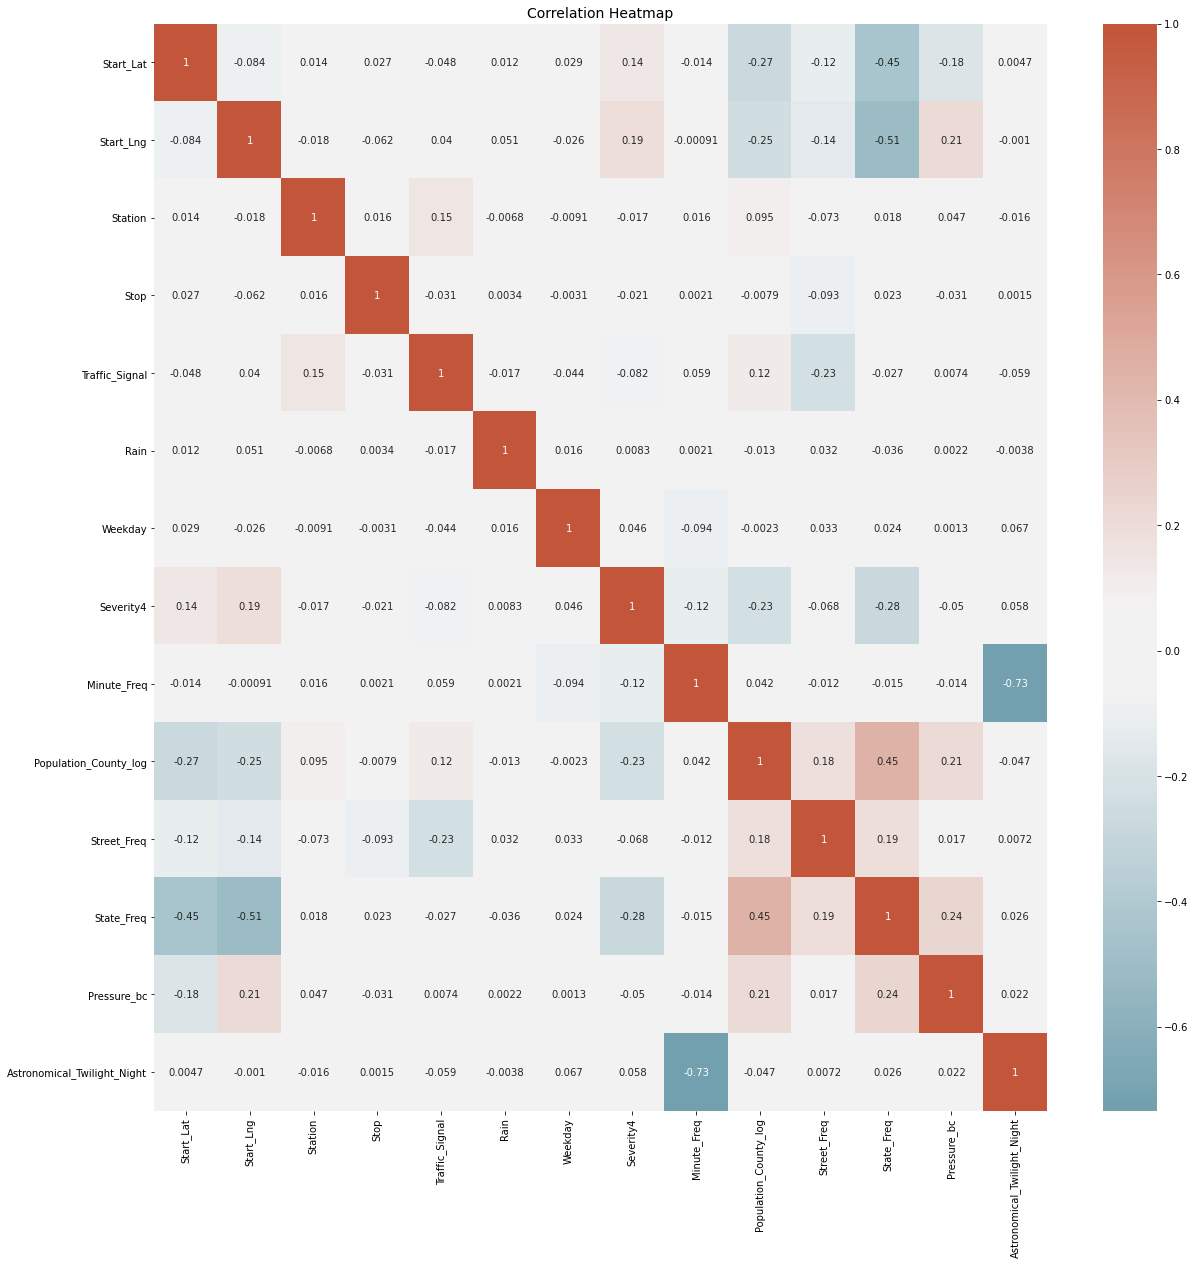

In [71]:
df_bl = resample(df, 'Severity4', 20000)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [72]:
df = df.replace([True, False], [1,0])

cat = ['Side','Timezone','Weekday']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984631 entries, 0 to 62131
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Astronomical_Twilight_Night  uint8  
 1   Side_R                       uint8  
 2   Timezone_US/Eastern          uint8  
 3   Timezone_US/Mountain         uint8  
 4   Timezone_US/Pacific          uint8  
 5   Weekday_1                    uint8  
 6   Weekday_2                    uint8  
 7   Weekday_3                    uint8  
 8   Weekday_4                    uint8  
 9   Weekday_5                    uint8  
 10  Weekday_6                    uint8  
 11  Start_Lat                    float32
 12  Start_Lng                    float32
 13  Minute_Freq                  float32
 14  Population_County_log        float32
 15  Street_Freq                  float32
 16  State_Freq                   float32
 17  Pressure_bc                  float32
dtypes: float32(7), uint8(11)
memory usage: 89.0 

In [73]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [74]:
X = df.drop('Side_R', axis=1)
y= df['Side_R']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30, random_state=42)

In [75]:
rus = RandomUnderSampler(sampling_strategy = 0.3, random_state=42)
X_train_res, y_train_res = rus.fit_sample(X_train, y_train)
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({1: 1131179, 0: 258062})
Distribution of class labels after resampling Counter({1: 860206, 0: 258062})


In [76]:
clf_base = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3),
        'penalty': ['l1', 'l2'],
        'class_weight': ['balanced']}
clf_lr = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_lr.fit(X_train_res, y_train_res)

coef = clf_lr.best_estimator_.coef_
intercept = clf_lr.best_estimator_.intercept_
print (classification_report(y_test, clf_lr.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.18750009        nan 0.18750009        nan 0.18750009
        nan 0.18750009        nan 0.18750009]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetr

              precision    recall  f1-score   support

           0       0.19      1.00      0.31    110859
           1       0.00      0.00      0.00    484531

    accuracy                           0.19    595390
   macro avg       0.09      0.50      0.16    595390
weighted avg       0.03      0.19      0.06    595390



In [77]:
clf_base = RandomForestClassifier()
grid = {'n_estimators': [10, 50, 100],
        'max_features': ['auto','sqrt']}
clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_rf.fit(X_train_res, y_train_res)
y_pred = clf_rf.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61    110859
           1       0.90      0.93      0.92    484531

    accuracy                           0.86    595390
   macro avg       0.78      0.75      0.76    595390
weighted avg       0.86      0.86      0.86    595390



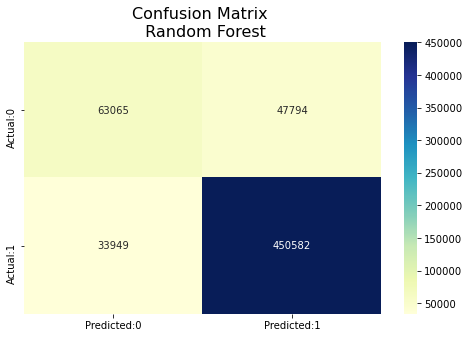

In [78]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()

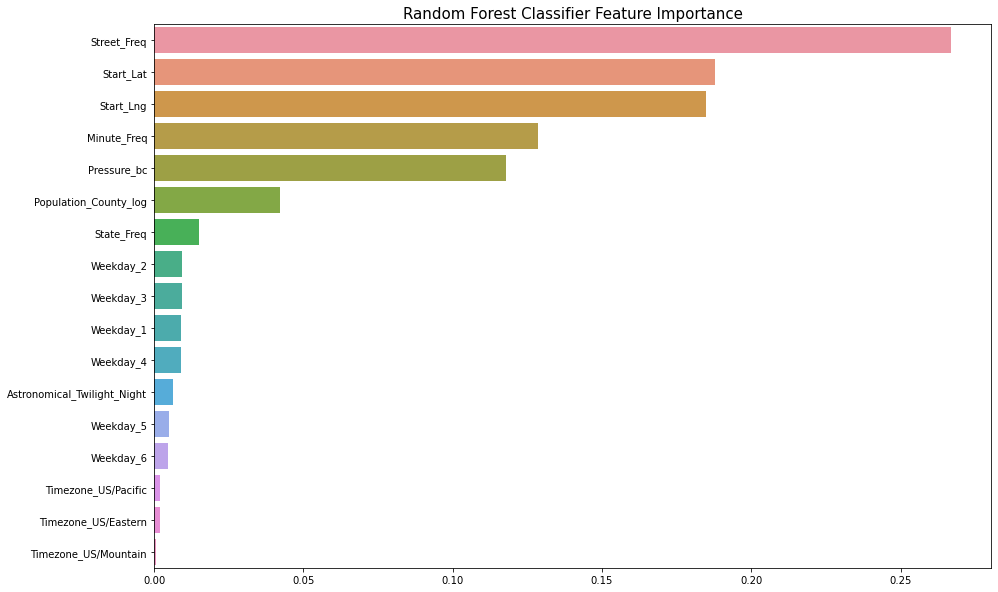

In [79]:
importances = pd.DataFrame(np.zeros((X_train_res.shape[1], 1)), columns=['importance'], index=df.drop('Side_R',axis=1).columns)

importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()

In [80]:
# n folds random under-sampling
def multi_rus(X, y, n_folds, ratio):
    X_res = [None] * n_folds
    y_res = [None] * n_folds
    rus = RandomUnderSampler(sampling_strategy = ratio, random_state=42)
    for i in range(n_folds):
        X_res[i], y_res[i] = rus.fit_sample(X, y)
        
    return X_res, y_res   

In [81]:
X_train_res, y_train_res = multi_rus(X_train, y_train, 3, 0.4)
y_pred_proba = np.zeros(len(y_test))
for i in range(len(y_train_res)):
    clf = RandomForestClassifier(n_estimators=100, max_features='auto')
    clf.fit(X_train_res[i], y_train_res[i])
    y_pred_proba += clf.predict(X_test)
    
y_pred_proba = y_pred_proba/len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.62    110859
           1       0.92      0.89      0.91    484531

    accuracy                           0.85    595390
   macro avg       0.75      0.78      0.77    595390
weighted avg       0.86      0.85      0.85    595390



In [82]:
X_train_res, y_train_res = multi_rus(X_train, y_train, 9, 0.4)
y_pred_proba = np.zeros(len(y_test))
for i in range(len(y_train_res)):
    clf = RandomForestClassifier(n_estimators=100, max_features='auto')
    clf.fit(X_train_res[i], y_train_res[i])
    y_pred_proba += clf.predict(X_test)
    
y_pred_proba = y_pred_proba/len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63    110859
           1       0.92      0.89      0.91    484531

    accuracy                           0.85    595390
   macro avg       0.76      0.78      0.77    595390
weighted avg       0.86      0.85      0.86    595390



In [83]:
X_train_res, y_train_res = multi_rus(X_train, y_train, 3, 0.4)
y_pred_proba = np.zeros(len(y_test))
for i in range(len(y_train_res)):
    clf_base = AdaBoostClassifier()
    grid = {'n_estimators': [10, 50, 100]}
    
    clf = GridSearchCV(clf_base, grid, cv=3, n_jobs=8, scoring='f1_macro')
    clf.fit(X_train_res[i], y_train_res[i])
    y_pred_proba += clf.predict(X_test)
    
y_pred_proba = y_pred_proba/len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.25      0.30    110859
           1       0.84      0.90      0.87    484531

    accuracy                           0.78    595390
   macro avg       0.60      0.58      0.58    595390
weighted avg       0.75      0.78      0.76    595390



In [84]:
def BalanceCascadeSample(X, 
                         y,
                         estimator=AdaBoostClassifier(),
                         random_state = 42,
                         n_max_subset = 10
                        ):
    """Resample the dataset.

    Parameters
    ----------
    estimator : object, optional (default=AdaBoostClassifier())
        An estimator inherited from :class:`sklearn.base.ClassifierMixin` and
        having an attribute :func:`predict_proba`.
        
    X : ndarray, shape (n_samples, n_features)
        Matrix containing the data which have to be sampled.

    y : ndarray, shape (n_samples, )
        Corresponding label for each sample in X.
        
    random_state : int, RandomState instance or None, optional (default=42)
        If int, ``random_state`` is the seed used by the random number
        generator; If ``RandomState`` instance, random_state is the random
        number generator; If ``None``, the random number generator is the
        ``RandomState`` instance used by ``np.random``.
    n_max_subset : int or None, optional (default=10)
        Maximum number of subsets to generate. By default, all data from
        the training will be selected that could lead to a large number of
        subsets. We can probably deduce this number empirically.
        
    Returns
    -------
    X_resampled : ndarray, shape (n_subset, n_samples_new, n_features)
        The array containing the resampled data.

    y_resampled : ndarray, shape (n_subset, n_samples_new)
        The corresponding label of `X_resampled`

    idx_under : ndarray, shape (n_subset, n_samples, )
        If `return_indices` is `True`, a boolean array will be returned
        containing the which samples have been selected.

    """
    # array to know which samples are available to be taken
    samples_mask = np.ones(y.shape, dtype=bool)

    # where the different set will be stored
    X_resampled = []
    y_resampled = []
    idx_under = []

    n_subsets = 0
    b_subset_search = True
    while b_subset_search:
        target_stats = Counter(y[samples_mask])
        # build the data set to be classified
        X_subset = np.empty((0, X.shape[1]), dtype=X.dtype)
        y_subset = np.empty((0, ), dtype=y.dtype)
        # store the index of the data to under-sample
        index_under_sample = np.empty((0, ), dtype=y.dtype)
        # value which will be picked at each round
        X_constant = np.empty((0, X.shape[1]), dtype=X.dtype)
        y_constant = np.empty((0, ), dtype=y.dtype)
        index_constant = np.empty((0, ), dtype=y.dtype)
        for target_class in target_stats.keys():            
            X_constant = np.concatenate((X_constant,
                                         X[y == target_class]),
                                        axis=0)
            y_constant = np.concatenate((y_constant,
                                        y[y == target_class]),
                                        axis=0)
            index_constant = np.concatenate(
                (index_constant,
                 np.flatnonzero(y == target_class)),
                axis=0)

        # store the set created
        n_subsets += 1
        X_resampled.append(np.concatenate((X_subset, X_constant),
                                          axis=0))
        y_resampled.append(np.concatenate((y_subset, y_constant),
                                          axis=0))
        idx_under.append(np.concatenate((index_under_sample,
                                         index_constant),
                                        axis=0))

        # fit and predict using cross validation
        pred = cross_val_predict(estimator,
                                 np.concatenate((X_subset, X_constant),
                                                axis=0),
                                 np.concatenate((y_subset, y_constant),
                                                axis=0))
        # extract the prediction about the targeted classes only
        pred_target = pred[:y_subset.size]
        index_classified = index_under_sample[pred_target == y_subset]
        samples_mask[index_classified] = False

        # check the stopping criterion
        if n_subsets == n_max_subset:
            b_subset_search = False

    return np.array(X_resampled), np.array(y_resampled)

In [85]:
rus = RandomUnderSampler(sampling_strategy = 0.4, random_state=42)
X_train_res, y_train_res = rus.fit_sample(X_train, y_train)
X_train_res, y_train_res = BalanceCascadeSample(X = X_train_res.to_numpy(), 
                                                y = y_train_res.to_numpy(),
                                                estimator=RandomForestClassifier(n_estimators=100, max_features='auto'),
                                                n_max_subset = 5)

In [86]:
y_pred_proba = np.zeros(len(y_test))
for i in range(len(y_train_res)):
    clf = RandomForestClassifier(n_estimators=100, max_features='auto')
    clf.fit(X_train_res[i], y_train_res[i])
    y_pred_proba += clf.predict(X_test)
    
y_pred_proba = y_pred_proba/len(y_train_res)
y_pred = (y_pred_proba > 0.5).astype(int)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63    110859
           1       0.92      0.89      0.91    484531

    accuracy                           0.85    595390
   macro avg       0.75      0.78      0.77    595390
weighted avg       0.86      0.85      0.85    595390



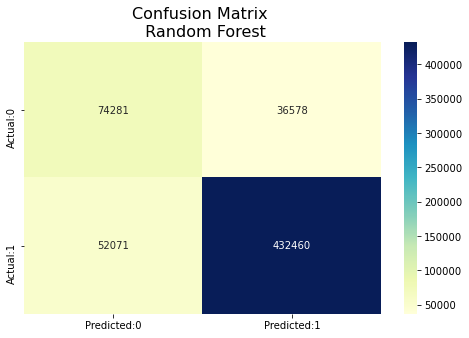

In [87]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()

In [89]:
import joblib

joblib.dump(clf, 'model_clf.h5')

['model_clf.h5']